In [1]:
import re
import platform
import sys
import os
import tweepy as tw
import twitter
import pandas as pd
import csv
from tweepy import Cursor
from datetime import datetime, date, time, timedelta
from collections import Counter
import matplotlib.pyplot as plt
import datetime

In [2]:
CONSUMER_KEY = 'kKEOC6n2BKBVsks5RH45BmiRw'
CONSUMER_SECRET = 'rXrfijW6S2wxb4Mt4yVil36QDcZNawsotjBb8X9PQ2zejmX6mr'

# to get the oauth credential you need to click on the 'Generate access token' button:
OAUTH_TOKEN = '1225147204739964929-obkKVb4GndaWd3GnZY6aCLafFPtbD7' 
OAUTH_TOKEN_SECRET = '7xNKPaSPQHfMzPeiD8JIemKg8dCQOBa3jp4Tx0922GGNP'
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,CONSUMER_KEY, CONSUMER_SECRET)
twitter_api = twitter.Twitter(auth=auth)
print(twitter_api) 

In [11]:
tweets_time = ['Time',]
tweets_id = ['Post_id',]
tweets_text = ['Tweet',]
tweets_retweet_count = ['Retweet count',]
tweets_likes = ['Like count']

auth = tw.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tw.API(auth, wait_on_rate_limit=True)

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet).split())

In [4]:
date_since = '2020-02-21'
date_until = '2020-03-03'
tweets_time = []
tweets_id = []
tweets_text = []
account_list = ["pizzahut"]

if len(account_list) > 0:
    for target in account_list:
        print("Getting data for " + target)
        item = api.get_user(target)
        print("name: " + item.name)
        print("screen_name: " + item.screen_name)
        print("description: " + item.description)
        print("statuses_count: " + str(item.statuses_count))
        print("friends_count: " + str(item.friends_count))
        print("followers_count: " + str(item.followers_count))

Getting data for pizzahut
name: Pizza Hut
screen_name: pizzahut
description: Proud Sponsor of the NFL and NCAA®.
statuses_count: 442946
friends_count: 88297
followers_count: 1625892


In [6]:
account_created_date = item.created_at
delta = datetime.datetime.utcnow() - account_created_date
account_age_days = delta.days
print("Account age (in days): " + str(account_age_days))

Account age (in days): 4466


In [12]:
#Array to hold most popular hashtags and mentions for later
hashtags = []
mentions = []
tweet_count = 0
end_date = datetime.datetime.utcnow() - datetime.timedelta(days=30)
for tweet in Cursor(api.user_timeline, id=target).items():
    if tweet.in_reply_to_status_id is None:
        #Tweet is not a reply
        #print(tweet.text)
        #print(tweet.retweet_count)
        #print(tweet.favorite_count)
        tweets_time.append(tweet.created_at)
        tweets_id.append(tweet.id)
        tweets_text.append(clean_tweet(tweet.text))
        tweets_retweet_count.append(tweet.retweet_count)
        tweets_likes.append(tweet.favorite_count)

rows = zip(tweets_time, tweets_id, tweets_text,tweets_retweet_count,tweets_likes)

In [13]:
newPath = "pizzahut_data.csv"
print('writing')
with open(newPath, "w") as f:
    writer = csv.writer(f)
    for row in rows:
        writer.writerow(row)
print('done')

writing
done


In [21]:
pizzahut_data = pd.read_csv(newPath)

In [27]:
date = pizzahut_data['Time']
#print(date)

In [26]:
for i in range(len(date)):
    dt = date[i][:10]
    year, month, day = (int(x) for x in dt.split('-'))  
    ans = datetime.date(year, month, day)
    pizzahut_data['Weekday'][i] = ans.strftime("%A")
    
#print(pizzahut_data['Weekday'])

/home/isualice/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [28]:
df = pizzahut_data
df.to_csv('pizzahut_Data.csv',index=False)

Text(0, 0.5, 'Official tweets number')

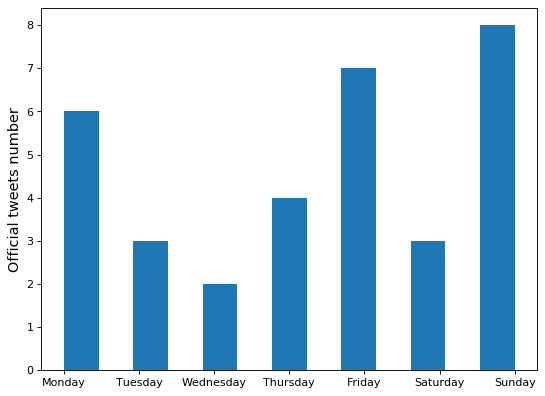

In [29]:
plt.figure(figsize=(8,6),dpi=80)
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Weekday'] = pd.Categorical(df['Weekday'], categories=cats, ordered=True)
df = df.sort_values('Weekday')
weekday = df['Weekday']
plt.hist(weekday,bins=13)
plt.ylabel('Official tweets number',fontsize=13)

In [33]:
Monday_retweet = 0
Tuesday_retweet = 0
Wednesday_retweet = 0
Thursday_retweet = 0
Friday_retweet = 0
Saturday_retweet = 0
Sunday_retweet = 0

retweet = df['Retweet count']
for i in range(len(weekday)):
    if weekday[i] == 'Monday':
        Monday_retweet += retweet[i]
    if weekday[i] == 'Tuesday':
        Tuesday_retweet += retweet[i]
    if weekday[i] == 'Wednesday':
        Wednesday_retweet += retweet[i]
    if weekday[i] == 'Thursday':
        Thursday_retweet += retweet[i]
    if weekday[i] == 'Friday':
        Friday_retweet += retweet[i]
    elif weekday[i] == 'Saturday':
        Saturday_retweet += retweet[i]
    else:
        Sunday_retweet += retweet[i]

retweet_count = dict()
retweet_count['Monday'] = Monday_retweet
retweet_count['Tuesday'] = Tuesday_retweet
retweet_count['Wednesday'] = Wednesday_retweet
retweet_count['Thursday'] = Thursday_retweet
retweet_count['Friday'] = Friday_retweet
retweet_count['Saturday'] = Saturday_retweet
retweet_count['Sunday'] = Sunday_retweet

print(retweet_count)

{'Monday': 503, 'Tuesday': 160, 'Wednesday': 107, 'Thursday': 270, 'Friday': 290, 'Saturday': 124, 'Sunday': 1838}


Text(0, 0.5, 'Retweet counts')

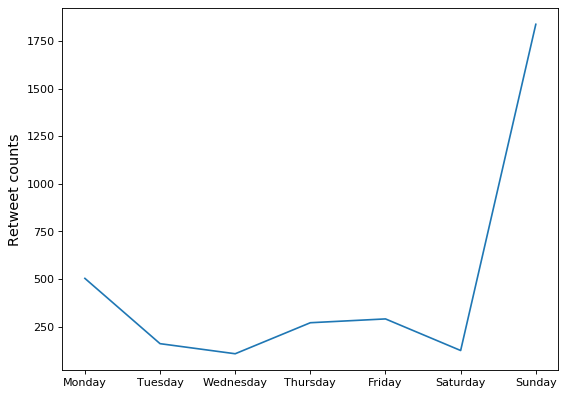

In [34]:
plt.figure(figsize=(8,6),dpi=80)

plt.plot(list(retweet_count.keys()),list(retweet_count.values()))
plt.ylabel('Retweet counts',fontsize=13)

In [35]:
Monday_like = 0
Tuesday_like = 0
Wednesday_like = 0
Thursday_like = 0
Friday_like = 0
Saturday_like = 0
Sunday_like = 0

like = df['Like count']
for i in range(len(weekday)):
    if weekday[i] == 'Monday':
        Monday_like += like[i]
    if weekday[i] == 'Tuesday':
        Tuesday_like += like[i]
    if weekday[i] == 'Wednesday':
        Wednesday_like += like[i]
    if weekday[i] == 'Thursday':
        Thursday_like += like[i]
    if weekday[i] == 'Friday':
        Friday_like += like[i]
    elif weekday[i] == 'Saturday':
        Saturday_like += like[i]
    else:
        Sunday_like += like[i]

like_count = dict()
like_count['Monday'] = Monday_like
like_count['Tuesday'] = Tuesday_like
like_count['Wednesday'] = Wednesday_like
like_count['Thursday'] = Thursday_like
like_count['Friday'] = Friday_like
like_count['Saturday'] = Saturday_like
like_count['Sunday'] = Sunday_like

print(like_count)

{'Monday': 2111, 'Tuesday': 989, 'Wednesday': 1047, 'Thursday': 1515, 'Friday': 2189, 'Saturday': 940, 'Sunday': 9086}


Text(0, 0.5, 'like counts')

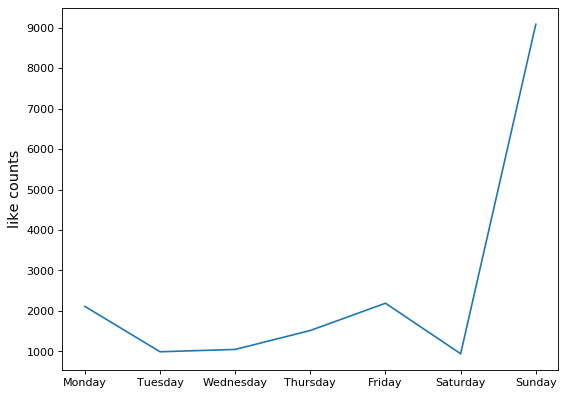

In [36]:
plt.figure(figsize=(8,6),dpi=80)

plt.plot(list(like_count.keys()),list(like_count.values()))
plt.ylabel('like counts',fontsize=13)